In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Carregar dados do arquivo Excel
df = pd.read_excel('Retail DB.xlsx')

# Pré-processamento dos dados
df['Description'].fillna('Indisponível', inplace=True)
df['CustomerID'].fillna(-1, inplace=True)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['Weekday'] = df['InvoiceDate'].dt.day_name()




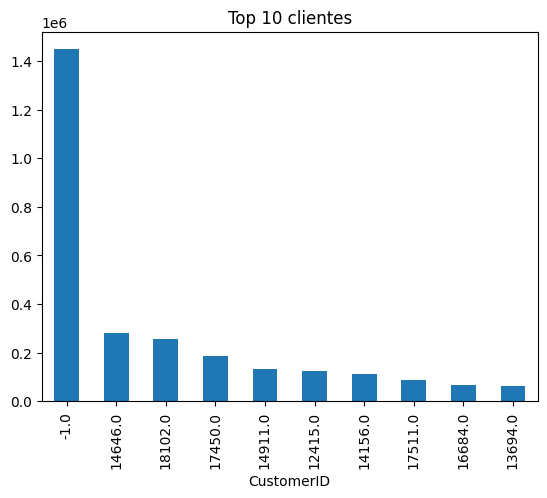

In [8]:
# Melhores clientes da loja
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 clientes')
plt.show()



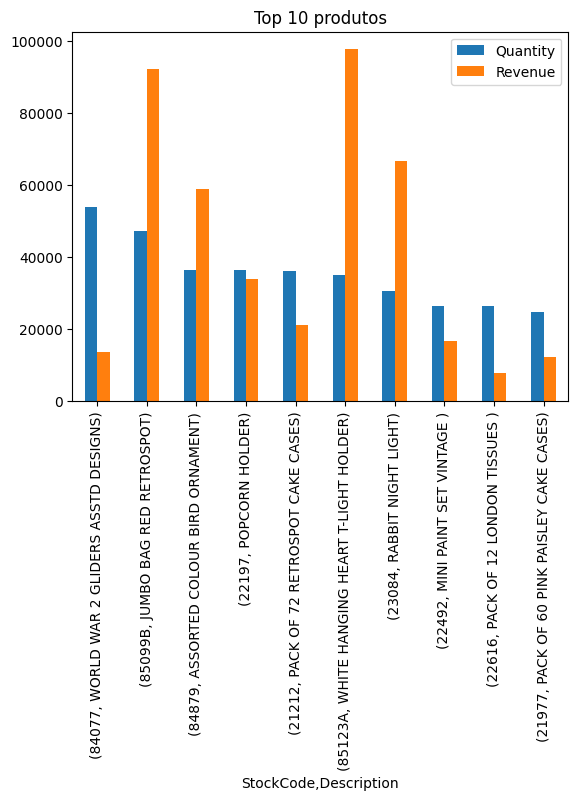

In [9]:
# Melhores produtos da loja
top_products = df.groupby(['StockCode', 'Description'])[['Quantity', 'Revenue']].sum().sort_values(['Quantity', 'Revenue'], ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 produtos')
plt.show()



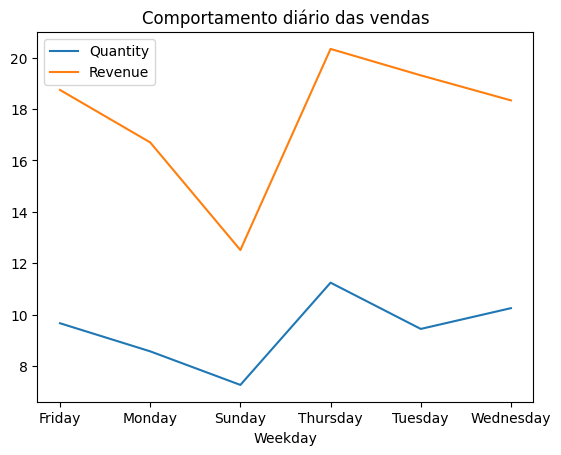

In [10]:
# Comportamento diário das vendas
weekday_sales = df.groupby('Weekday')[['Quantity', 'Revenue']].mean()
weekday_sales.plot(kind='line', title='Comportamento diário das vendas')
plt.show()



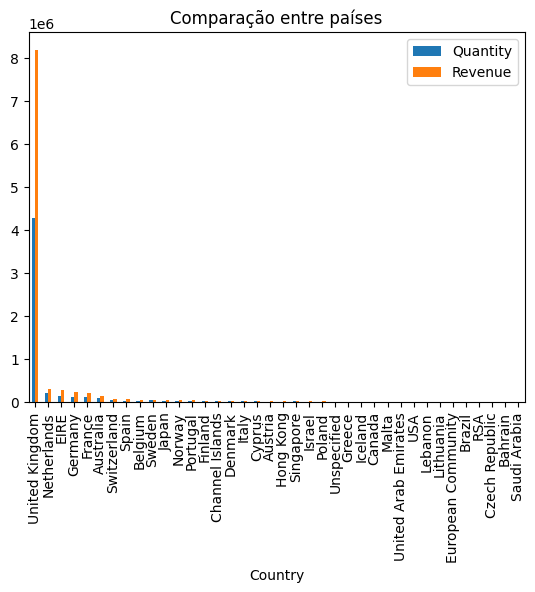

In [11]:
# Comparação entre países
country_comparison = df.groupby('Country')[['Quantity', 'Revenue']].sum().sort_values('Revenue', ascending=False)
country_comparison.plot(kind='bar', title='Comparação entre países')
plt.show()



In [12]:
# Segmentação de clientes usando RFM
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
rfm_data = df[df['CustomerID'] != -1].groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Revenue': 'sum'
})
rfm_data.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Revenue': 'MonetaryValue'}, inplace=True)


In [13]:

# Dividir os clientes em 3 grupos com base em Recency, Frequency e MonetaryValue
rfm_data['R'] = pd.qcut(rfm_data['Recency'], 3, labels=list(reversed(range(1, 4))))
rfm_data['F'] = pd.qcut(rfm_data['Frequency'], 3, labels=list(range(1, 4)))
rfm_data['M'] = pd.qcut(rfm_data['MonetaryValue'], 3, labels=list(range(1, 4)))

# Calcular a pontuação RFM para cada cliente
rfm_data['RFM_Score'] = rfm_data[['R', 'F', 'M']].sum(axis=1)

# Segmentar os clientes em grupos de alto, médio e baixo valor
rfm_data['Segment'] = 'Low-Value'
rfm_data.loc[rfm_data['RFM_Score'] > 3, 'Segment'] = 'Mid-Value'
rfm_data.loc[rfm_data['RFM_Score'] > 6, 'Segment'] = 'High-Value'

# Exibir a contagem de clientes em cada segmento
print(rfm_data['Segment'].value_counts())

Mid-Value     1871
High-Value    1840
Low-Value      661
Name: Segment, dtype: int64
